# Keras Basic Model

In [1]:
import matplotlib.pyplot as plt

In [2]:
def plot_mnist(data, classes, labels, incorrect=None):
    plt.figure(figsize=(15,15))
    for i in range(10):
        idxs = (classes == i) #조건에 맞는 index만 True 나머지는 False로 리턴된다.
        # 클래스 i에 해당하는 10개의 데이터
        
        if incorrect is not None:
            idxs *= incorrect
        
        images = data[idxs][0:10] #True조건을 만족하는 index로 data를 뽑고 그 중 10개를 뽑는다.
            
        for j in range(5):   
            plt.subplot(5, 10, i + j*10 + 1) # 행, 열, plot번호
            plt.imshow(images[j].reshape(28, 28), cmap='gray')
            # 클래스당 타이틀 표시
            if j == 0:
                plt.title(labels[i])
            plt.axis('off')
    plt.show()

In [3]:
CLASSES = 10
LABELS = ['T-shirts', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [5]:
from keras.datasets import fashion_mnist

In [6]:
(train_input, train_label), (test_input, test_label) = fashion_mnist.load_data()

In [7]:
train_input

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
type(train_input)

numpy.ndarray

In [9]:
train_input.shape

(60000, 28, 28)

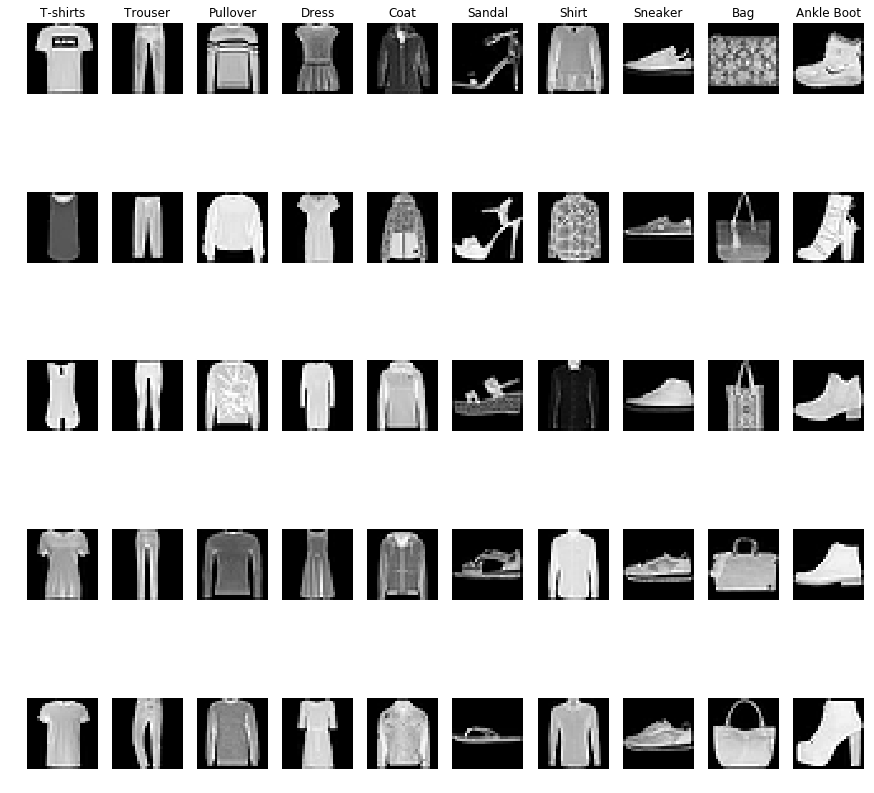

In [10]:
plot_mnist(train_input, train_label, LABELS)

In [11]:
train_input.shape

(60000, 28, 28)

In [12]:
val_input = train_input[50000:60000, ]

In [13]:
val_input.shape

(10000, 28, 28)

In [14]:
train_input = train_input[0:50000, ]

In [15]:
train_input.shape

(50000, 28, 28)

In [16]:
val_label = train_label[50000:60000, ]
train_label = train_label[0:50000, ]

In [17]:
train_input = train_input.reshape(-1, 784)
val_input = val_input.reshape(-1, 784)
test_input = test_input.reshape(-1, 784)

In [18]:
train_input.shape

(50000, 784)

In [19]:
train_label

array([9, 0, 0, ..., 5, 1, 7], dtype=uint8)

In [20]:
train_one_hot = keras.utils.to_categorical(train_label)

In [21]:
train_one_hot

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [22]:
val_one_hot = keras.utils.to_categorical(val_label)
test_one_hot = keras.utils.to_categorical(test_label)

In [23]:
model = Sequential()

In [24]:
model.add(Dense(100, activation='sigmoid', input_shape=(784, )))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
Total params: 78,500
Trainable params: 78,500
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.add(Dense(50, activation='sigmoid'))

In [27]:
model.add(Dense(10, activation='softmax'))

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.fit(x=train_input, y=train_one_hot, batch_size=1000, epochs=20, 
          validation_data=(val_input, val_one_hot))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 10s 191us/step - loss: 1.2161 - acc: 0.6375 - val_loss: 0.9807 - val_acc: 0.7018
Epoch 2/20
50000/50000 [==============================] - 10s 194us/step - loss: 0.8828 - acc: 0.6964 - val_loss: 0.8337 - val_acc: 0.6948
Epoch 3/20
50000/50000 [==============================] - 9s 189us/step - loss: 0.8552 - acc: 0.6883 - val_loss: 0.8467 - val_acc: 0.6686
Epoch 4/20
50000/50000 [==============================] - 10s 197us/step - loss: 0.8687 - acc: 0.6832 - val_loss: 0.8257 - val_acc: 0.6865
Epoch 5/20
50000/50000 [==============================] - 10s 196us/step - loss: 0.8892 - acc: 0.6720 - val_loss: 0.8492 - val_acc: 0.6879
Epoch 6/20
50000/50000 [==============================] - 10s 196us/step - loss: 0.9049 - acc: 0.6583 - val_loss: 0.9638 - val_acc: 0.6574
Epoch 7/20
50000/50000 [==============================] - 10s 197us/step - loss: 0.9228 - acc: 0.6543 - val_loss: 0.9

In [30]:
result = model.evaluate(test_input, test_one_hot)

10000/10000 [==============================] - 7s 748us/step


In [31]:
result

[2.3592495975494385, 0.1412]

In [32]:
pred = model.predict(train_input)

In [33]:
pred

array([[0.10262029, 0.04461185, 0.06235244, ..., 0.08091275, 0.12121066,
        0.19196044],
       [0.1447801 , 0.0418549 , 0.0732336 , ..., 0.06419707, 0.12385667,
        0.14174645],
       [0.15359418, 0.04036201, 0.06099164, ..., 0.06468903, 0.14131615,
        0.13988458],
       ...,
       [0.10318442, 0.0505253 , 0.08401933, ..., 0.08096018, 0.10728393,
        0.16823225],
       [0.13068484, 0.03363708, 0.06244364, ..., 0.06371292, 0.13196404,
        0.1492018 ],
       [0.09650061, 0.04639684, 0.06480748, ..., 0.0822181 , 0.10333943,
        0.17457682]], dtype=float32)

In [34]:
pred_argmax = pred.argmax(1)

In [35]:
pred_argmax

array([9, 4, 0, ..., 4, 4, 4], dtype=int64)

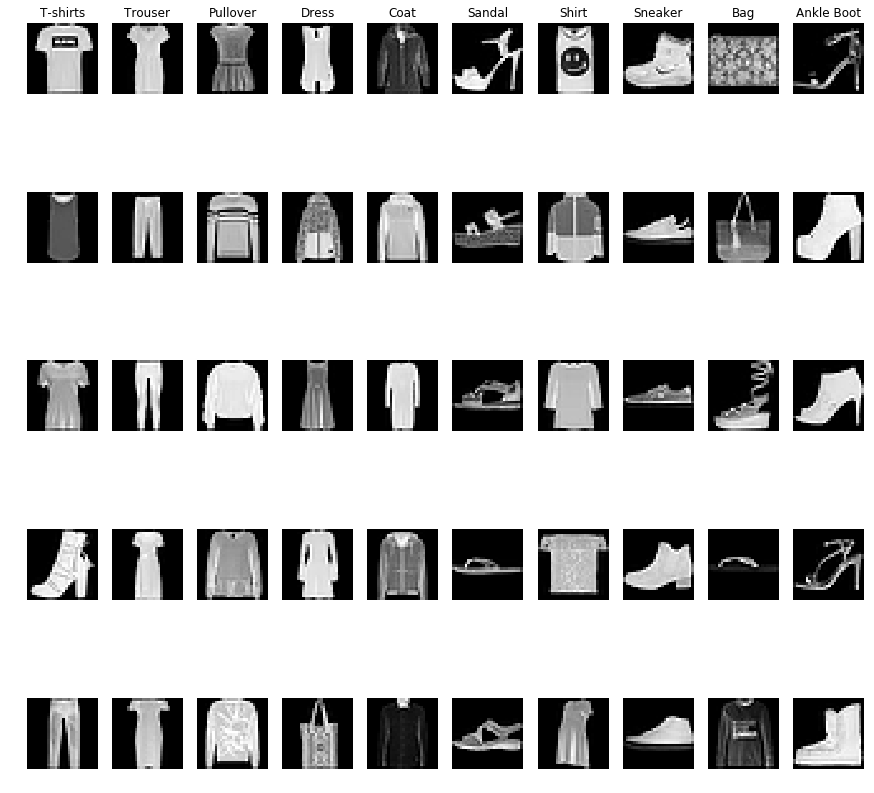

In [40]:
plot_mnist(train_input, pred_argmax, LABELS)

# Improve Model - Normalization

In [36]:
train_input.max(1)

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [37]:
train_input = train_input / 255

In [38]:
train_input.max(1)

array([1., 1., 1., ..., 1., 1., 1.])

In [39]:
test_input = test_input / 255
val_input = val_input / 255

In [40]:
model.reset_states()

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(x=train_input, y=train_one_hot, batch_size=10, epochs=20, 
          validation_data=(val_input, val_one_hot))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 10s 201us/step - loss: 0.7281 - acc: 0.7277 - val_loss: 0.6634 - val_acc: 0.7524
Epoch 2/20
50000/50000 [==============================] - 11s 210us/step - loss: 0.6297 - acc: 0.7648 - val_loss: 0.6031 - val_acc: 0.7681
Epoch 3/20
50000/50000 [==============================] - 10s 205us/step - loss: 0.5787 - acc: 0.7821 - val_loss: 0.5658 - val_acc: 0.7861
Epoch 4/20
50000/50000 [==============================] - 10s 201us/step - loss: 0.5438 - acc: 0.7998 - val_loss: 0.5341 - val_acc: 0.8039
Epoch 5/20
50000/50000 [==============================] - 10s 201us/step - loss: 0.5176 - acc: 0.8119 - val_loss: 0.5141 - val_acc: 0.8127
Epoch 6/20
50000/50000 [==============================] - 12s 230us/step - loss: 0.4966 - acc: 0.8213 - val_loss: 0.4945 - val_acc: 0.8191
Epoch 7/20
50000/50000 [==============================] - 10s 201us/step - loss: 0.4787 - acc: 0.8289 - val_loss: 0.

In [49]:
model.evaluate(test_input, test_one_hot)

10000/10000 [==============================] - 0s 37us/step


[0.41192102260589597, 0.8506]

# Improve Model - Change Activation Function

In [42]:
model2 = Sequential()

In [45]:
from keras.layers import InputLayer

In [46]:
model2.add(InputLayer([784, ]))

In [47]:
model2.add(Dense(200, activation='relu'))

In [48]:
model2.add(Dense(100))

In [49]:
from keras.layers import Activation

In [50]:
model2.add(Activation('relu'))

In [51]:
model2.add(Dense(50, activation='relu'))

In [52]:
model2.add(Dense(10, activation='softmax'))

In [53]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
Total params: 182,660
Trainable params: 182,660
Non-trainable params: 0
_________________________________________________________________


In [54]:
model2.compile(optimizer='sgd', loss='categorical_crossentropy', 
               metrics=['accuracy'])

In [56]:
model2.reset_states()

In [57]:
model2.fit(train_input, train_one_hot, epochs=200, batch_size=500,
           validation_data=(val_input, val_one_hot))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 1s 14us/step - loss: 0.3352 - acc: 0.8829 - val_loss: 0.3701 - val_acc: 0.8719
Epoch 2/200
50000/50000 [==============================] - 1s 13us/step - loss: 0.3360 - acc: 0.8812 - val_loss: 0.3680 - val_acc: 0.8711
Epoch 3/200
50000/50000 [==============================] - 1s 13us/step - loss: 0.3327 - acc: 0.8827 - val_loss: 0.3685 - val_acc: 0.8715
Epoch 4/200
50000/50000 [==============================] - 1s 13us/step - loss: 0.3312 - acc: 0.8843 - val_loss: 0.3761 - val_acc: 0.8676
Epoch 5/200
50000/50000 [==============================] - 1s 13us/step - loss: 0.3292 - acc: 0.8855 - val_loss: 0.3730 - val_acc: 0.8691
Epoch 6/200
50000/50000 [==============================] - 1s 13us/step - loss: 0.3311 - acc: 0.8838 - val_loss: 0.3661 - val_acc: 0.8732
Epoch 7/200
50000/50000 [==============================] - 1s 13us/step - loss: 0.3286 - acc: 0.8845 - val_loss: 0.3670 - 

Epoch 118/200
50000/50000 [==============================] - 1s 13us/step - loss: 0.2514 - acc: 0.9110 - val_loss: 0.3346 - val_acc: 0.8841
Epoch 119/200
50000/50000 [==============================] - 1s 13us/step - loss: 0.2538 - acc: 0.9098 - val_loss: 0.3437 - val_acc: 0.8788
Epoch 120/200
50000/50000 [==============================] - 1s 13us/step - loss: 0.2506 - acc: 0.9116 - val_loss: 0.3376 - val_acc: 0.8820
Epoch 121/200
50000/50000 [==============================] - 1s 13us/step - loss: 0.2520 - acc: 0.9112 - val_loss: 0.3342 - val_acc: 0.8819
Epoch 122/200
50000/50000 [==============================] - 1s 13us/step - loss: 0.2518 - acc: 0.9107 - val_loss: 0.3306 - val_acc: 0.8842
Epoch 123/200
50000/50000 [==============================] - 1s 13us/step - loss: 0.2495 - acc: 0.9113 - val_loss: 0.3519 - val_acc: 0.8781
Epoch 124/200
50000/50000 [==============================] - 1s 13us/step - loss: 0.2501 - acc: 0.9116 - val_loss: 0.3442 - val_acc: 0.8773
Epoch 125/200
50000/

# Improve Model - Add Dropout

In [63]:
model3 = Sequential()

In [62]:
from keras.layers import Dropout

In [64]:
model3.add(Dense(200, activation='relu', input_shape=(784, )))

In [65]:
model3.add(Dropout(0.2))

In [66]:
model3.add(Dense(100, activation='relu'))
model3.add(Dropout(0.2))

In [67]:
model3.add(Dense(50, activation='relu'))
model3.add(Dropout(0.2))

In [68]:
model3.add(Dense(10, activation='softmax'))

In [69]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 200)               157000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                510       
Total para

In [70]:
model3.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [71]:
model3.fit(train_input, train_one_hot, epochs=200, batch_size=100,
          validation_data=(val_input, val_one_hot))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 2s 43us/step - loss: 1.3970 - acc: 0.5055 - val_loss: 0.7867 - val_acc: 0.7210
Epoch 2/200
50000/50000 [==============================] - 2s 36us/step - loss: 0.8872 - acc: 0.6774 - val_loss: 0.6650 - val_acc: 0.7697
Epoch 3/200
50000/50000 [==============================] - 2s 36us/step - loss: 0.7669 - acc: 0.7267 - val_loss: 0.5979 - val_acc: 0.7888
Epoch 4/200
50000/50000 [==============================] - 2s 35us/step - loss: 0.6966 - acc: 0.7553 - val_loss: 0.5577 - val_acc: 0.8025
Epoch 5/200
50000/50000 [==============================] - 2s 35us/step - loss: 0.6487 - acc: 0.7741 - val_loss: 0.5216 - val_acc: 0.8167
Epoch 6/200
50000/50000 [==============================] - 2s 36us/step - loss: 0.6119 - acc: 0.7874 - val_loss: 0.4995 - val_acc: 0.8226
Epoch 7/200
50000/50000 [==============================] - 2s 35us/step - loss: 0.5821 - acc: 0.8000 - val_loss: 0.4804 - 

Epoch 118/200
50000/50000 [==============================] - 2s 35us/step - loss: 0.2362 - acc: 0.9165 - val_loss: 0.3109 - val_acc: 0.8933
Epoch 119/200
50000/50000 [==============================] - 2s 36us/step - loss: 0.2333 - acc: 0.9165 - val_loss: 0.3071 - val_acc: 0.8935
Epoch 120/200
50000/50000 [==============================] - 2s 35us/step - loss: 0.2311 - acc: 0.9194 - val_loss: 0.3088 - val_acc: 0.8949
Epoch 121/200
50000/50000 [==============================] - 2s 35us/step - loss: 0.2342 - acc: 0.9158 - val_loss: 0.3198 - val_acc: 0.8906
Epoch 122/200
50000/50000 [==============================] - 2s 35us/step - loss: 0.2331 - acc: 0.9170 - val_loss: 0.3062 - val_acc: 0.8930
Epoch 123/200
50000/50000 [==============================] - 2s 35us/step - loss: 0.2296 - acc: 0.9190 - val_loss: 0.3116 - val_acc: 0.8952
Epoch 124/200
50000/50000 [==============================] - 2s 35us/step - loss: 0.2270 - acc: 0.9188 - val_loss: 0.3141 - val_acc: 0.8914
Epoch 125/200
50000/

# Improve Model - Change Optimizer

In [72]:
model3.reset_states()

In [73]:
model3.compile(optimizer='adam', loss='categorical_crossentropy',
               metrics=['accuracy'])

In [74]:
model3.optimizer

In [75]:
model3.fit(train_input, train_one_hot, epochs=200, batch_size=100,
          validation_data=(val_input, val_one_hot))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 2s 46us/step - loss: 0.4133 - acc: 0.8575 - val_loss: 0.3676 - val_acc: 0.8665
Epoch 2/200
50000/50000 [==============================] - 2s 39us/step - loss: 0.3604 - acc: 0.8707 - val_loss: 0.4209 - val_acc: 0.8488
Epoch 3/200
50000/50000 [==============================] - 2s 39us/step - loss: 0.3401 - acc: 0.8783 - val_loss: 0.3545 - val_acc: 0.8809
Epoch 4/200
50000/50000 [==============================] - 2s 39us/step - loss: 0.3333 - acc: 0.8822 - val_loss: 0.3572 - val_acc: 0.8754
Epoch 5/200
50000/50000 [==============================] - 2s 39us/step - loss: 0.3242 - acc: 0.8843 - val_loss: 0.3469 - val_acc: 0.8836
Epoch 6/200
50000/50000 [==============================] - 2s 39us/step - loss: 0.3141 - acc: 0.8909 - val_loss: 0.3628 - val_acc: 0.8761
Epoch 7/200
50000/50000 [==============================] - 2s 39us/step - loss: 0.3083 - acc: 0.8891 - val_loss: 0.3417 - 

Epoch 118/200
50000/50000 [==============================] - 2s 39us/step - loss: 0.2555 - acc: 0.9308 - val_loss: 0.5919 - val_acc: 0.8850
Epoch 119/200
50000/50000 [==============================] - 2s 39us/step - loss: 0.2562 - acc: 0.9318 - val_loss: 0.5526 - val_acc: 0.8867
Epoch 120/200
50000/50000 [==============================] - 2s 39us/step - loss: 0.2546 - acc: 0.9337 - val_loss: 0.5493 - val_acc: 0.8884
Epoch 121/200
50000/50000 [==============================] - 2s 39us/step - loss: 0.2645 - acc: 0.9307 - val_loss: 0.5160 - val_acc: 0.8868
Epoch 122/200
50000/50000 [==============================] - 2s 39us/step - loss: 0.2475 - acc: 0.9322 - val_loss: 0.4934 - val_acc: 0.8888
Epoch 123/200
50000/50000 [==============================] - 2s 39us/step - loss: 0.2624 - acc: 0.9303 - val_loss: 0.4787 - val_acc: 0.8913
Epoch 124/200
50000/50000 [==============================] - 2s 39us/step - loss: 0.2583 - acc: 0.9337 - val_loss: 0.5236 - val_acc: 0.8912
Epoch 125/200
50000/

KeyboardInterrupt: 

In [76]:
from keras.optimizers import RMSprop, SGD, Adam

In [ ]:
rmsprop = RMSprop()

# Basic CNN Model with Fashion MNIST

In [77]:
cnn_model = Sequential()

In [78]:
train_input.shape

(50000, 784)

In [79]:
train_input = train_input.reshape(-1, 28, 28)

In [80]:
train_input.shape

(50000, 28, 28)

In [81]:
from keras.layers import Conv2D, MaxPool2D, Flatten

In [83]:
cnn_model.add(Conv2D(16, (3, 3), activation='relu', 
                     padding='same', input_shape=(28,28,1,)))

In [84]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


In [85]:
cnn_model.add(MaxPool2D((2,2)))

In [86]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


In [88]:
cnn_model.add(Conv2D(32, (3,3), activation='relu',
                    padding='valid'))


In [89]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        4640      
Total params: 4,800
Trainable params: 4,800
Non-trainable params: 0
_________________________________________________________________


In [90]:
cnn_model.add(MaxPool2D((2,2)))

In [91]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
Total params: 4,800
Trainable params: 4,800
Non-trainable params: 0
_________________________________________________________________


In [92]:
cnn_model.add(Flatten())

In [93]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
Total params: 4,800
Trainable params: 4,800
Non-trainable params: 0
_________________________________________________________________


In [94]:
cnn_model.add(Dense(200, activation='relu'))
cnn_model.add(Dense(100, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

In [95]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 200)               230600    
_________________________________________________________________
dense_17 (Dense)             (None, 100)               20100     
__________